In [1]:
#install.packages('Metrics')
library('astsa')
library(forecast)
library('Metrics')

options(repr.plot.width=14, repr.plot.height=6)


Registered S3 methods overwritten by 'tibble':
  method     from  
  format.tbl pillar
  print.tbl  pillar

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang

Registered S3 method overwritten by 'xts':
  method     from
  as.zoo.xts zoo 

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 


Attaching package: ‘forecast’


The following object is masked from ‘package:astsa’:

    gas



Attaching package: ‘Metrics’


The following object is masked from ‘package:forecast’:

    accuracy




In [2]:
setwd('./')
#ts_df <- read.csv("./data/proyectos_analiticos_20210501-20210531_resampled.csv")
ts_df <- read.csv("./data/proyectos_analiticos_20210501-20210531_no_weekends_resampled.csv")

In [3]:
ts_df <- ts_df[,2]

x = ts(ts_df, start=0 , frequency=1)


In [4]:
x = x/300000 # paso la unidad a slots

In [5]:
ts_df = ts_df/300000 # paso la unidad a slots

In [6]:
ts_df = ts(ts_df, start=0, frequency=1)

In [7]:
length(ts_df)

[1] 6048

In [ ]:
head(time(ts_df))

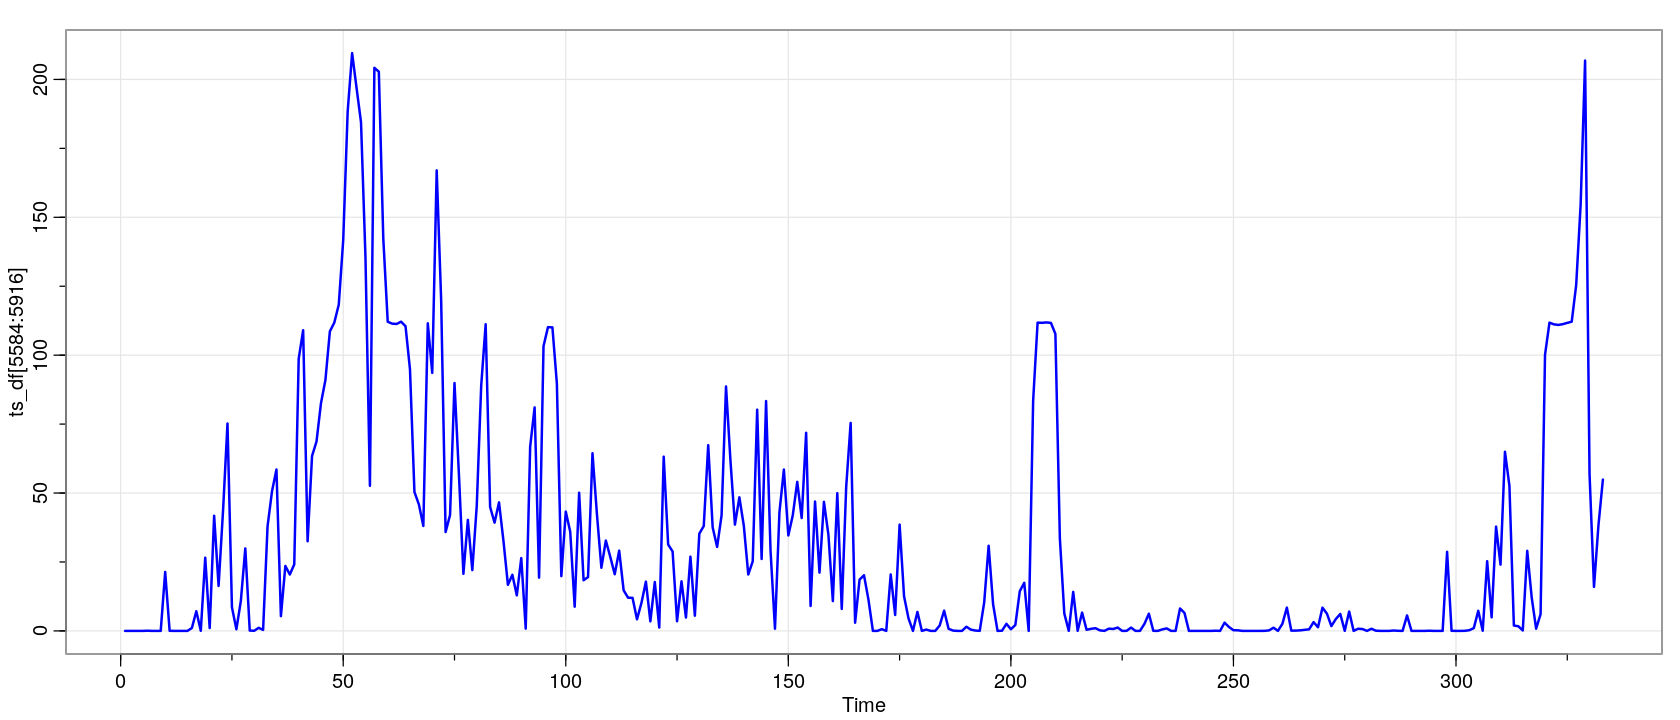

In [9]:
# dias 19 al 21 de mayo (arranca en 18*288=5184)
tsplot(ts_df[5584:5916], col=4, lwd=2)

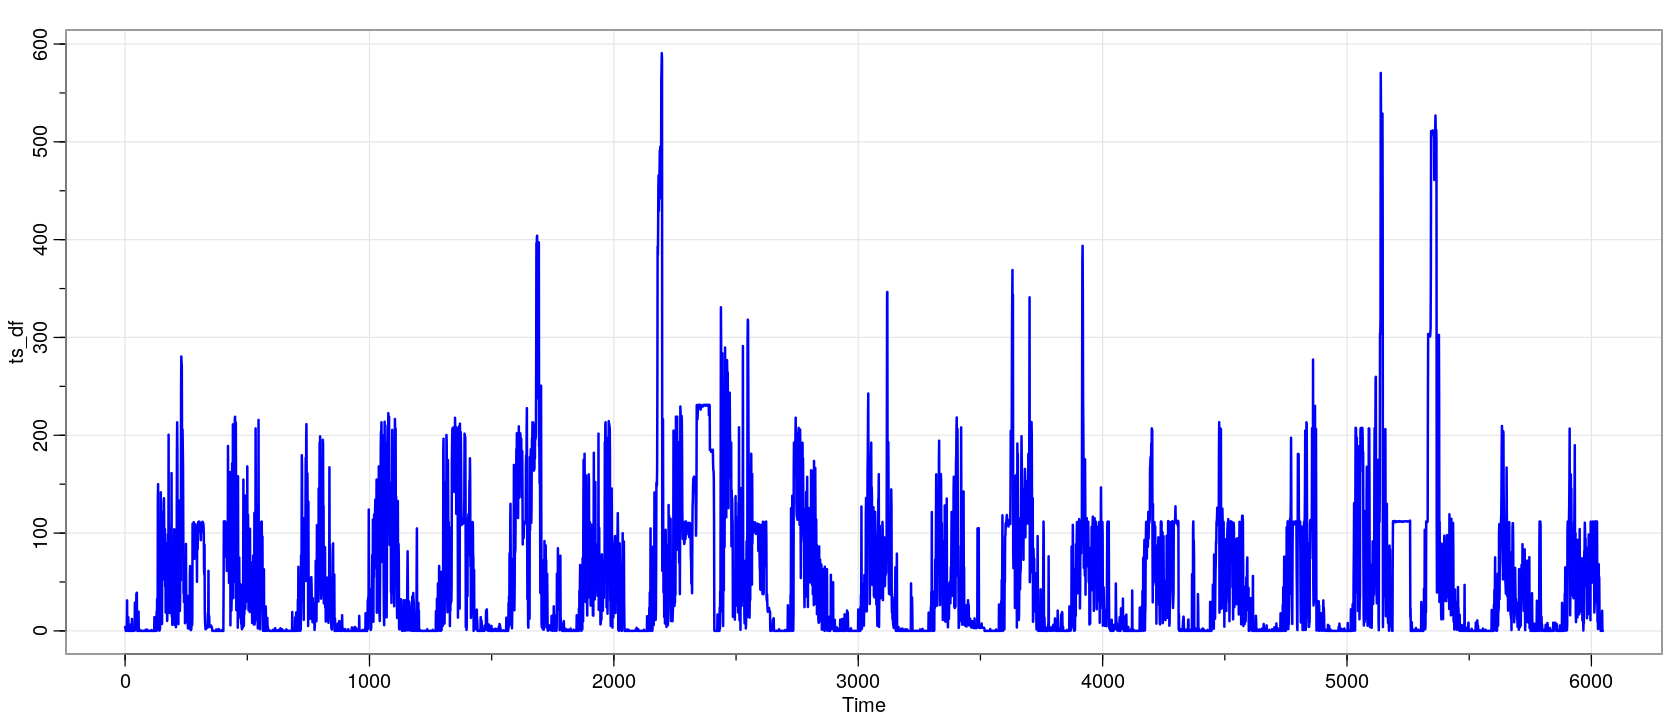

In [10]:
tsplot(ts_df, col=4, lwd=2)

In [11]:
start_train = 1000
start_test = 2950
time_series = ts_df

In [12]:



    
ret = c(0,0)

ts_length = length(time_series)        

end_train = start_test - 1

ts_df_train = ts(time_series[start_train:end_train], start=start_train-1, frequency=1)
ts_df_test = ts(time_series[start_test:ts_length], start=start_test-1, frequency=1)

dn = ts_df_train
dnt = ts_df_test


In [13]:
   
# agrego para probar +1 para evitar log(0)
ldn = log(dn+1)
ldnt = log(dnt+1)
t = time(ldn)


In [14]:
head(t)

A Time Series:
[1]  999 1000 1001 1002 1003 1004

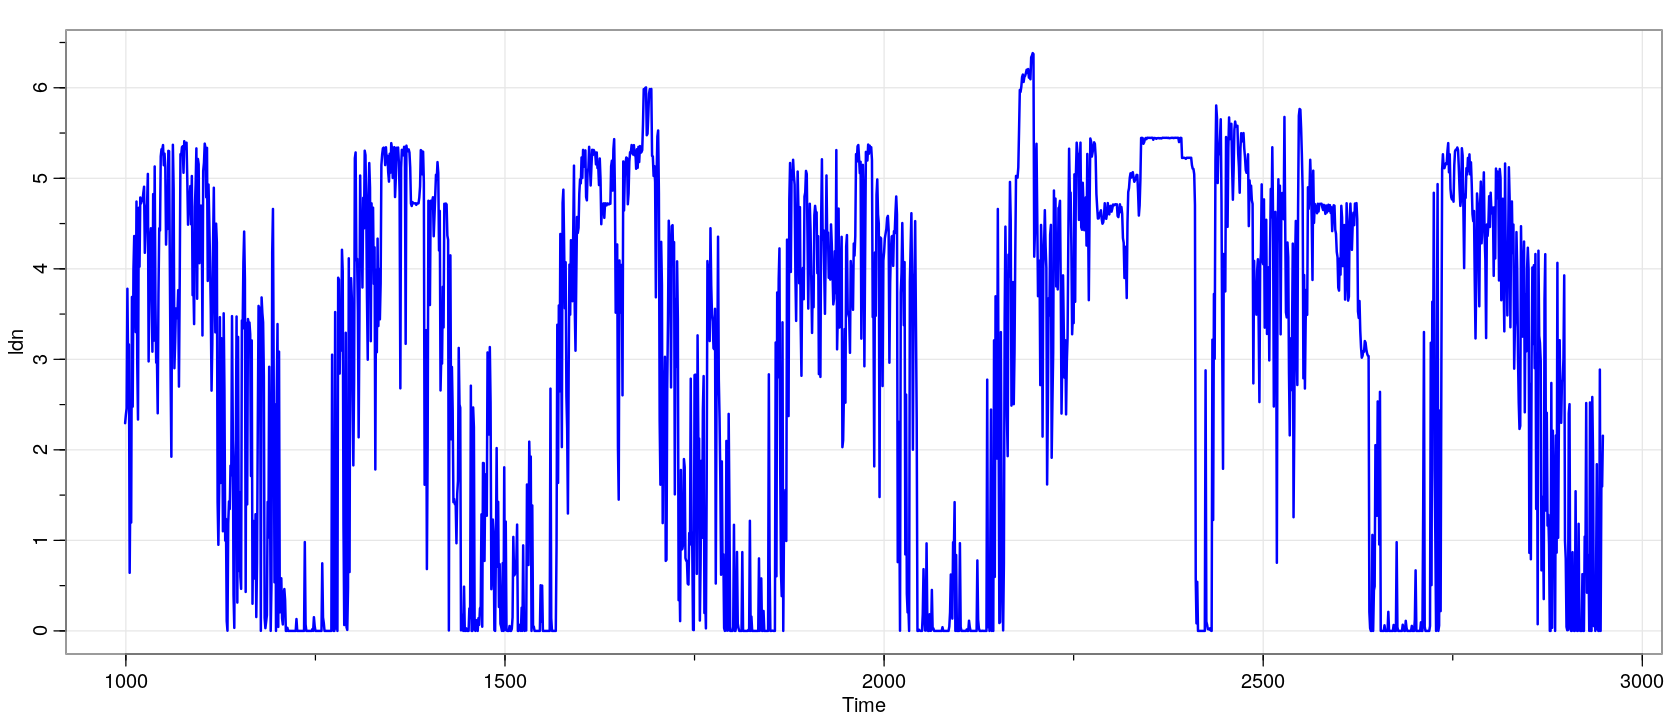

In [15]:
tsplot(ldn, col=4, lwd=2)

In [16]:
# nuevos datos para prediccion

new_t = seq(start_test-1,start_test-1,by=1)
new_t = ts(new_t,start=start_test-1,freq=1)
new_data = data.frame(t=new_t)

In [17]:
new_data

t
<ts>
2949


In [18]:
   
fittrn = lm(ldn ~ t, na.action=NULL)

#ndata <- data.frame(t = start_test-1)
ndata <- data.frame(t = new_data)


predict_trend = predict(fittrn,newdata=ndata)

predicttrend = ts(fitted(fittrn), start=start_train-1, freq=1)

#ldn = as.numeric(ldn)
ldnc = ldn-predicttrend

###
ldnc = ts(ldn-predicttrend, start=start_train-1, freq=1)
### 


In [19]:
summary(fittrn)


Call:
lm(formula = ldn ~ t, na.action = NULL)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.2320 -2.3337  0.6539  1.7746  3.3555 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 2.428e+00  1.687e-01  14.390  < 2e-16 ***
t           2.729e-04  8.223e-05   3.319  0.00092 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.044 on 1948 degrees of freedom
Multiple R-squared:  0.005623,	Adjusted R-squared:  0.005113 
F-statistic: 11.02 on 1 and 1948 DF,  p-value: 0.0009199


In [20]:
head(time(ldn))

A Time Series:
[1]  999 1000 1001 1002 1003 1004

In [21]:
head(time(ldnc))

A Time Series:
[1]  999 1000 1001 1002 1003 1004

In [22]:
head(time(predicttrend))

A Time Series:
[1]  999 1000 1001 1002 1003 1004

In [23]:
head(time(ldnc))

A Time Series:
[1]  999 1000 1001 1002 1003 1004

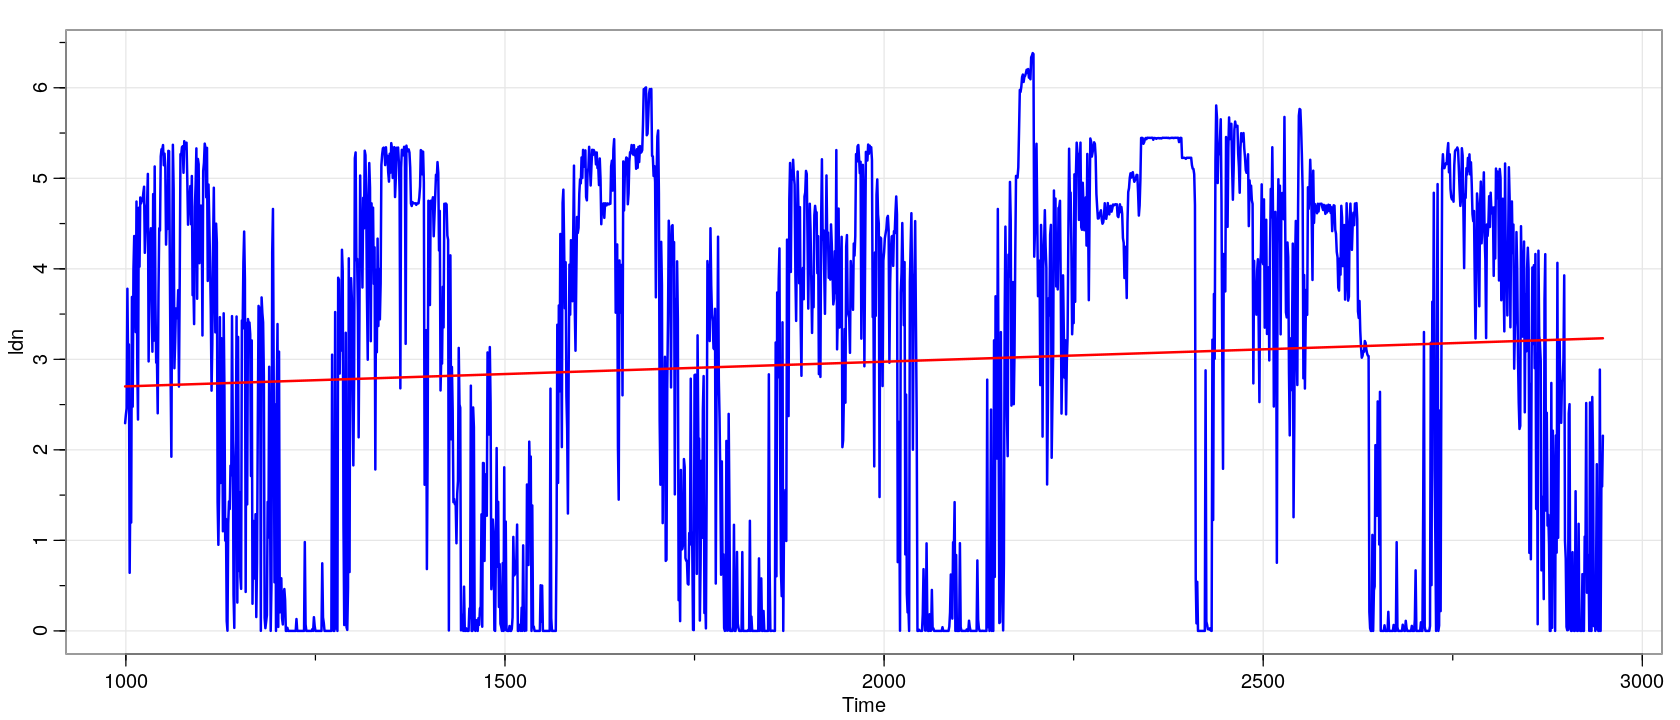

In [24]:
tsplot(ldn, col=4, lwd=2)
lines(predicttrend, col=2, lwd=2)

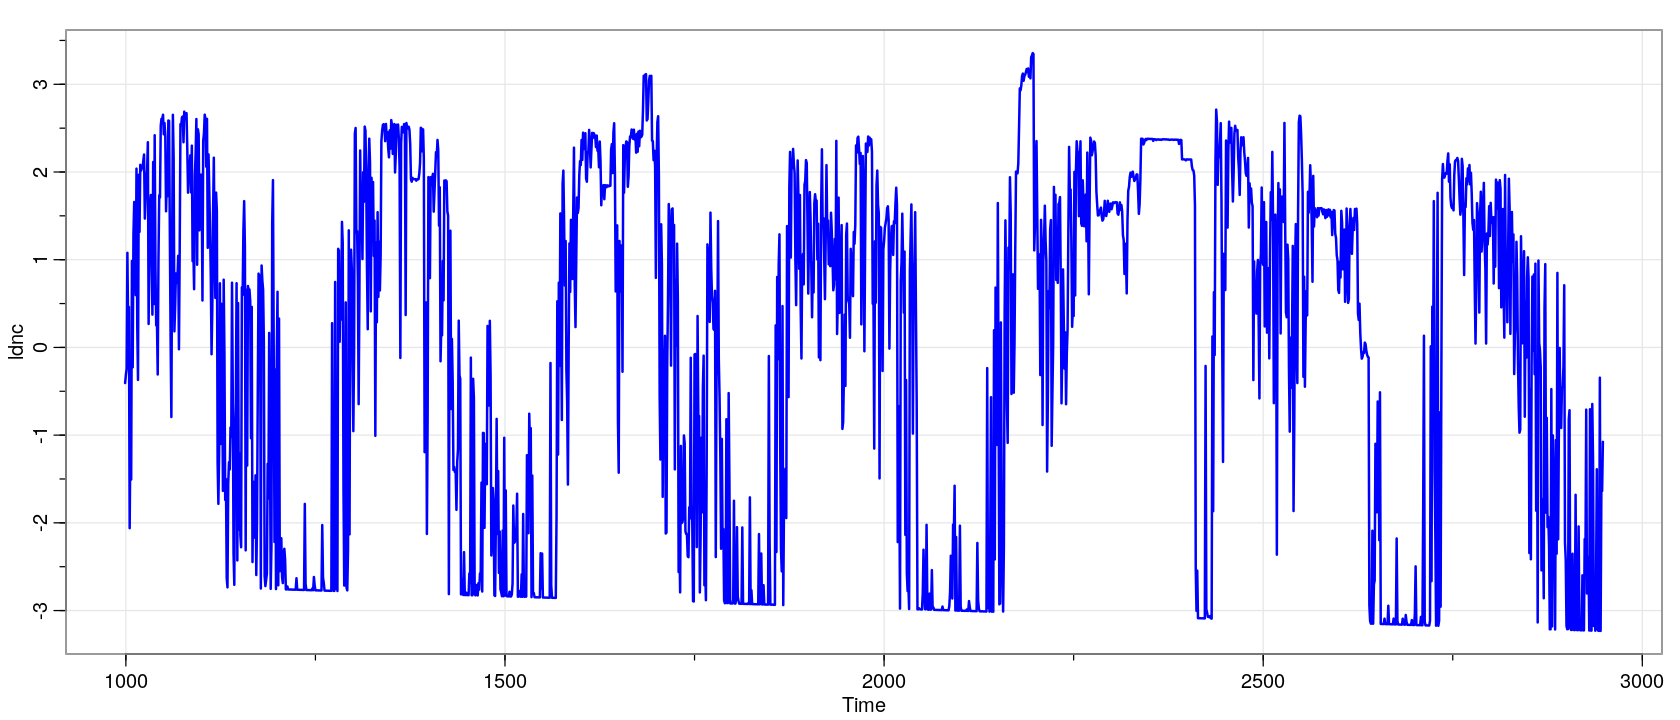

In [25]:
tsplot(ldnc, col=4, lwd=2)

In [26]:
    
t = time(ldnc) 


f1 =  0.003473

fit = lm(ldnc ~ 0 + cos(2*pi*f1*t) + sin(2*pi*f1*t) ,
         na.action=NULL)

prediction = ts(fitted(fit), start=start_train-1, freq=1)

#tn = ts_length
tn = start_test - 1 
        
v = 0 + cos(2*pi*f1*tn) + sin(2*pi*f1*tn) 

#vdf <- data.frame(t = v)
vdf <- data.frame(t = new_data)

fore_f = predict(fit, vdf)    

res = (ts(residuals(fit), start=start_train -1, freq=1))

   

In [27]:
summary(fit)


Call:
lm(formula = ldnc ~ 0 + cos(2 * pi * f1 * t) + sin(2 * pi * f1 * 
    t), na.action = NULL)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.2407 -1.2637 -0.1218  1.0071  4.2505 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
cos(2 * pi * f1 * t)  0.04228    0.04969   0.851    0.395    
sin(2 * pi * f1 * t) -1.87997    0.04999 -37.607   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.556 on 1948 degrees of freedom
Multiple R-squared:  0.4206,	Adjusted R-squared:   0.42 
F-statistic: 707.1 on 2 and 1948 DF,  p-value: < 2.2e-16


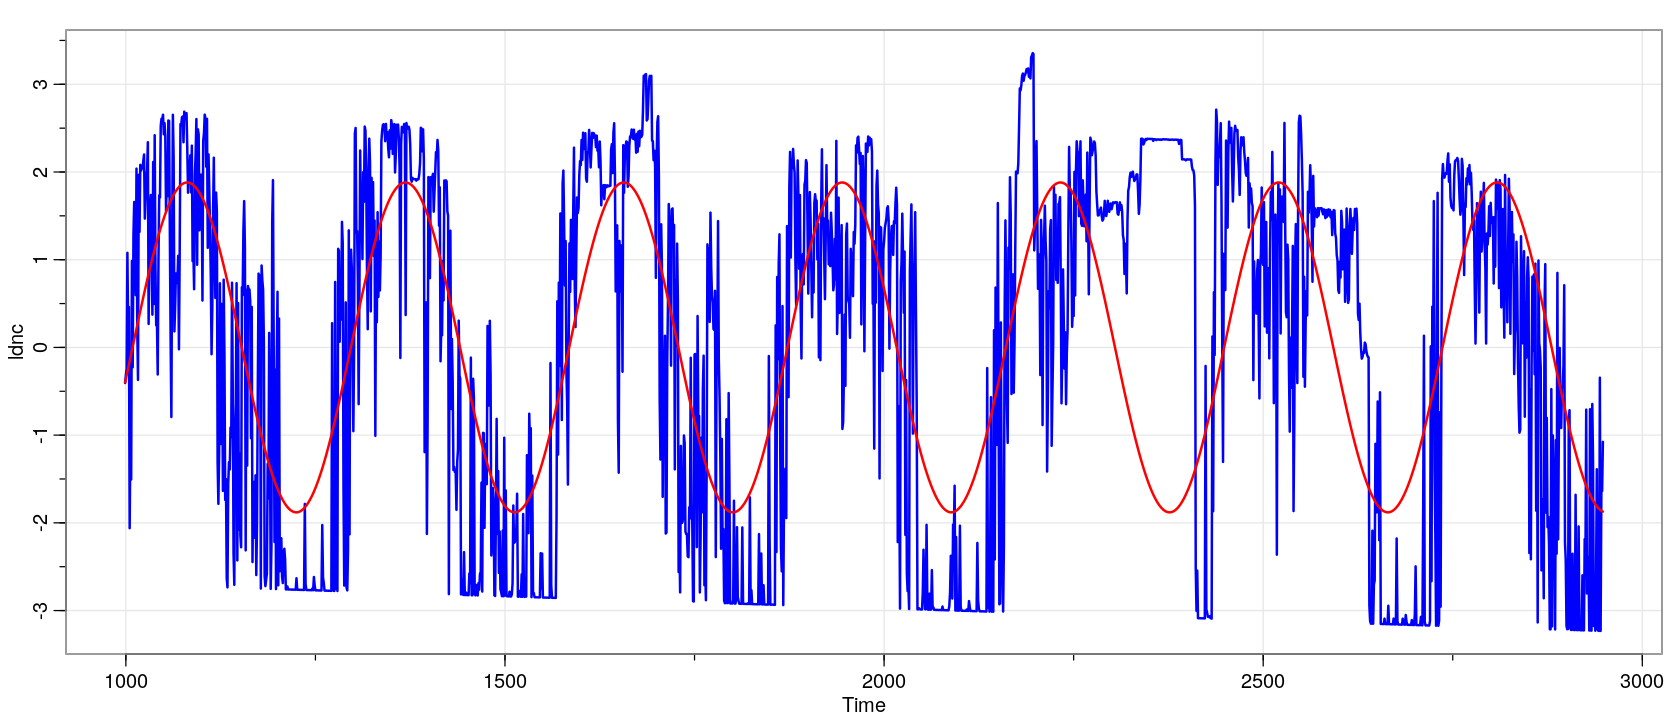

In [28]:
tsplot(ldnc, col=4, lwd=2)
lines(prediction, col=2, lwd=2)

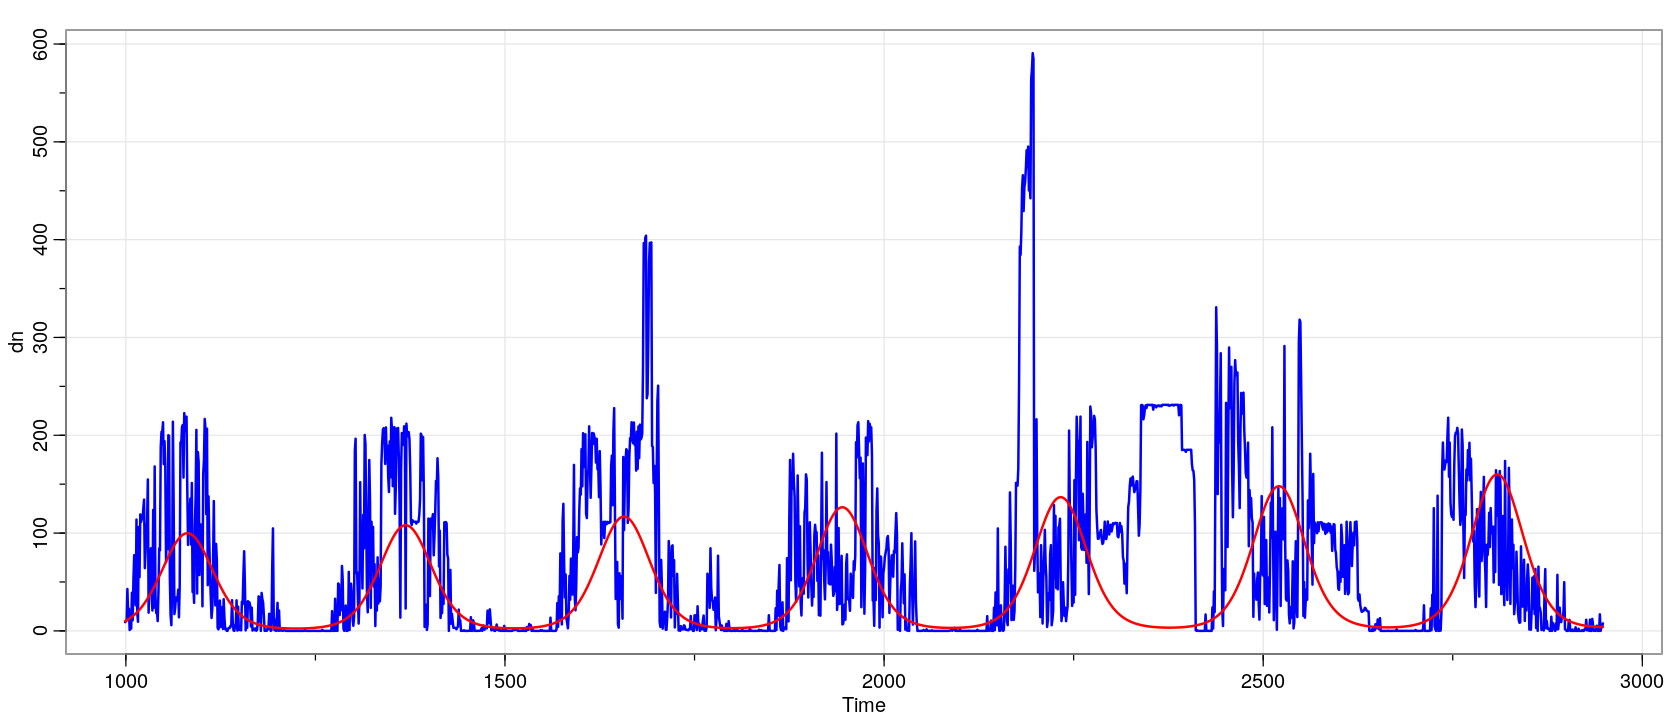

In [29]:
tsplot(dn, col=4, lwd=2)
lines(exp(prediction+predicttrend),col=2,lwd=2)

In [30]:
tail(time(prediction+predicttrend))

A Time Series:
[1] 2943 2944 2945 2946 2947 2948

In [31]:
new_t = seq(2949,3500,by=1)
new_t = ts(new_t,start=2949,freq=1)
new_data = data.frame(t=new_t)

In [32]:
predict_freq = predict(fit, new_data)
ts_predict_freq = ts(predict_freq,start=2949,freq=1)
#ts_predict_freq

In [33]:
predict_trnd = predict(fittrn, new_data)
ts_predict_trnd = ts(predict_trnd,start=2949,freq=1)

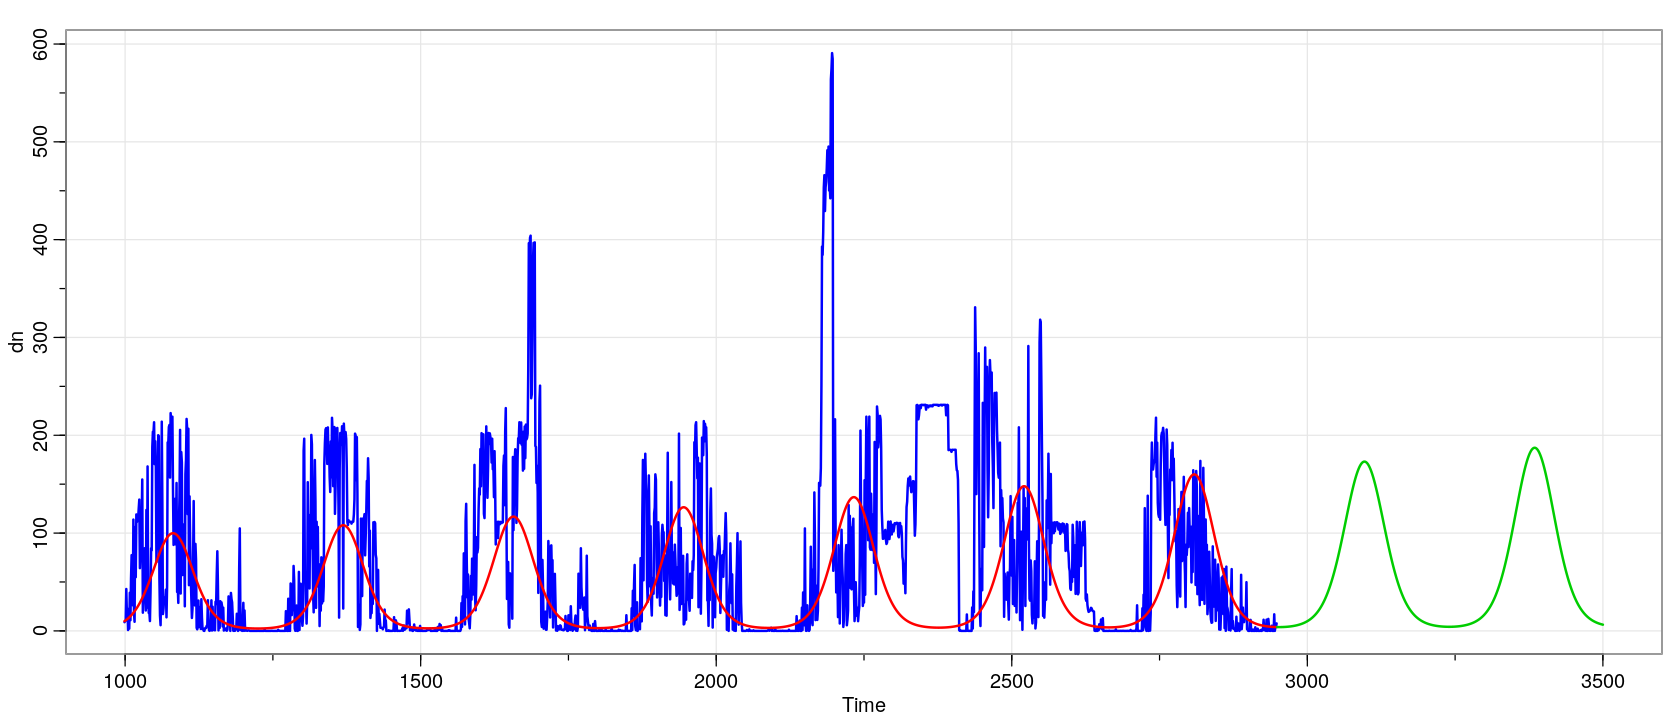

In [34]:
tsplot(dn, col=4, lwd=2, xlim=c(1000,3500))
lines(exp(prediction+predicttrend),col=2,lwd=2)
lines(exp(ts_predict_freq+ts_predict_trnd),col=3,lwd=2)

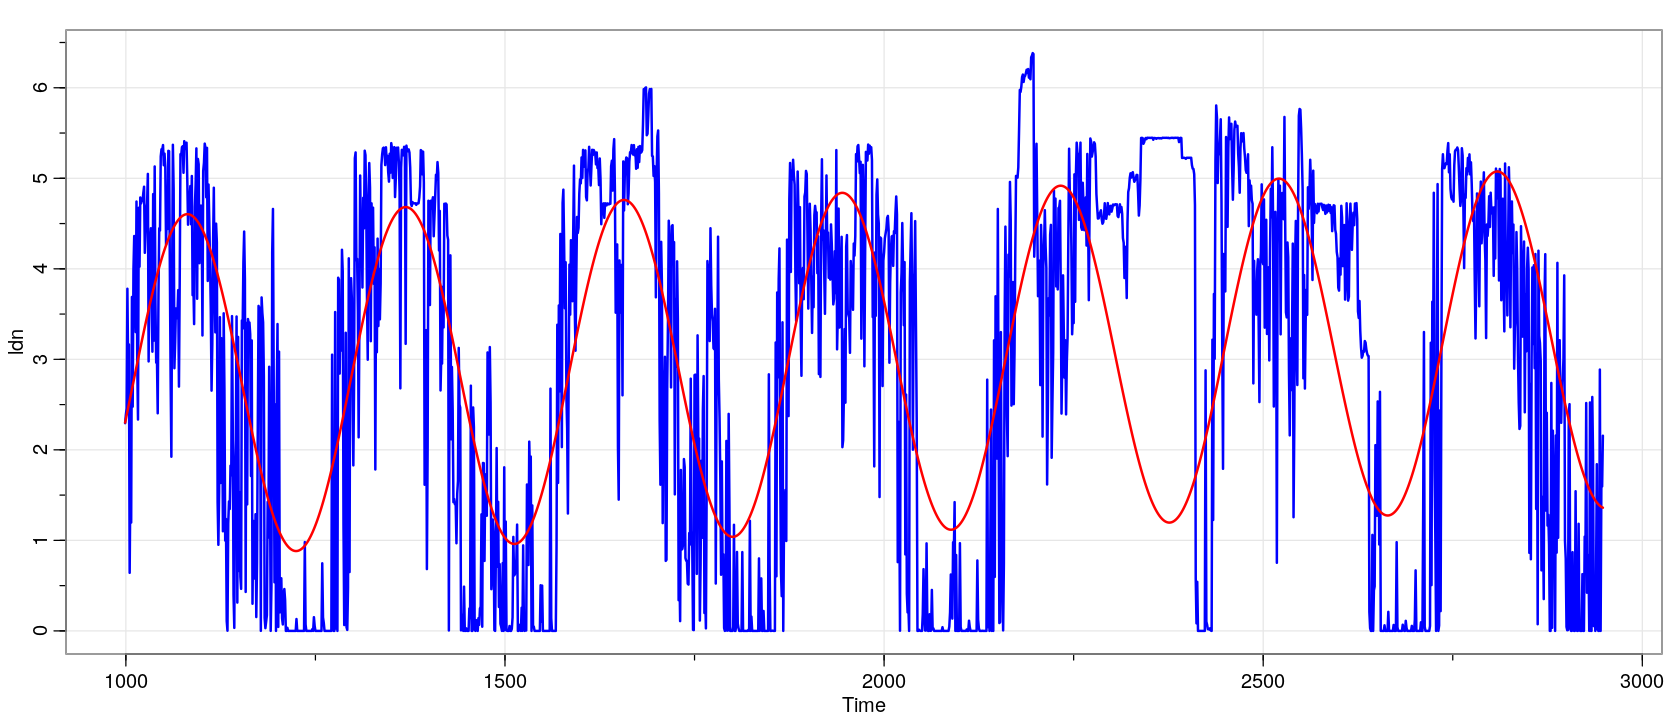

In [35]:
tsplot(ldn, col=4, lwd=2)
lines(prediction+predicttrend, col=2, lwd=2)

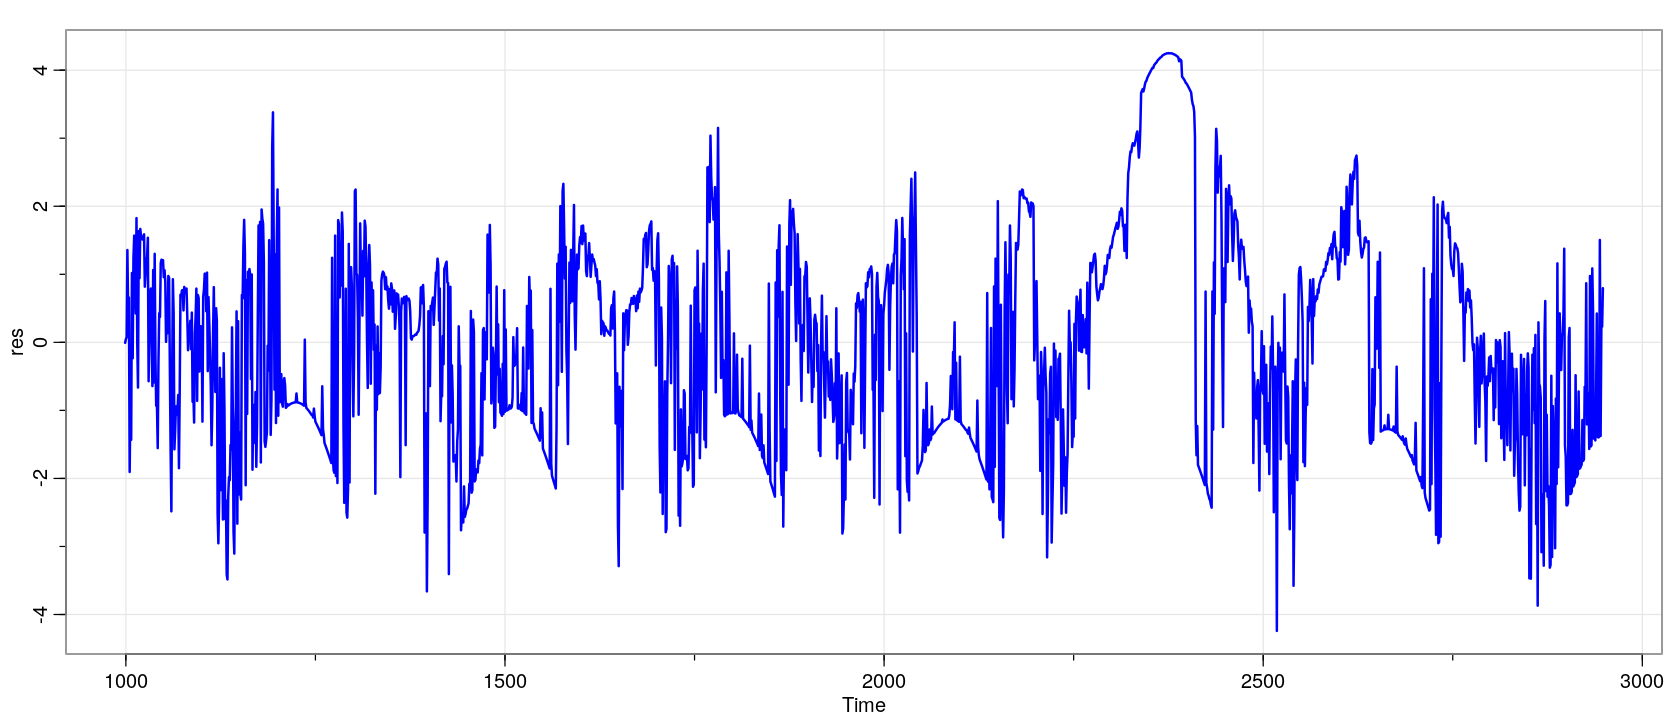

In [36]:
tsplot(res, col=4, lwd=2)

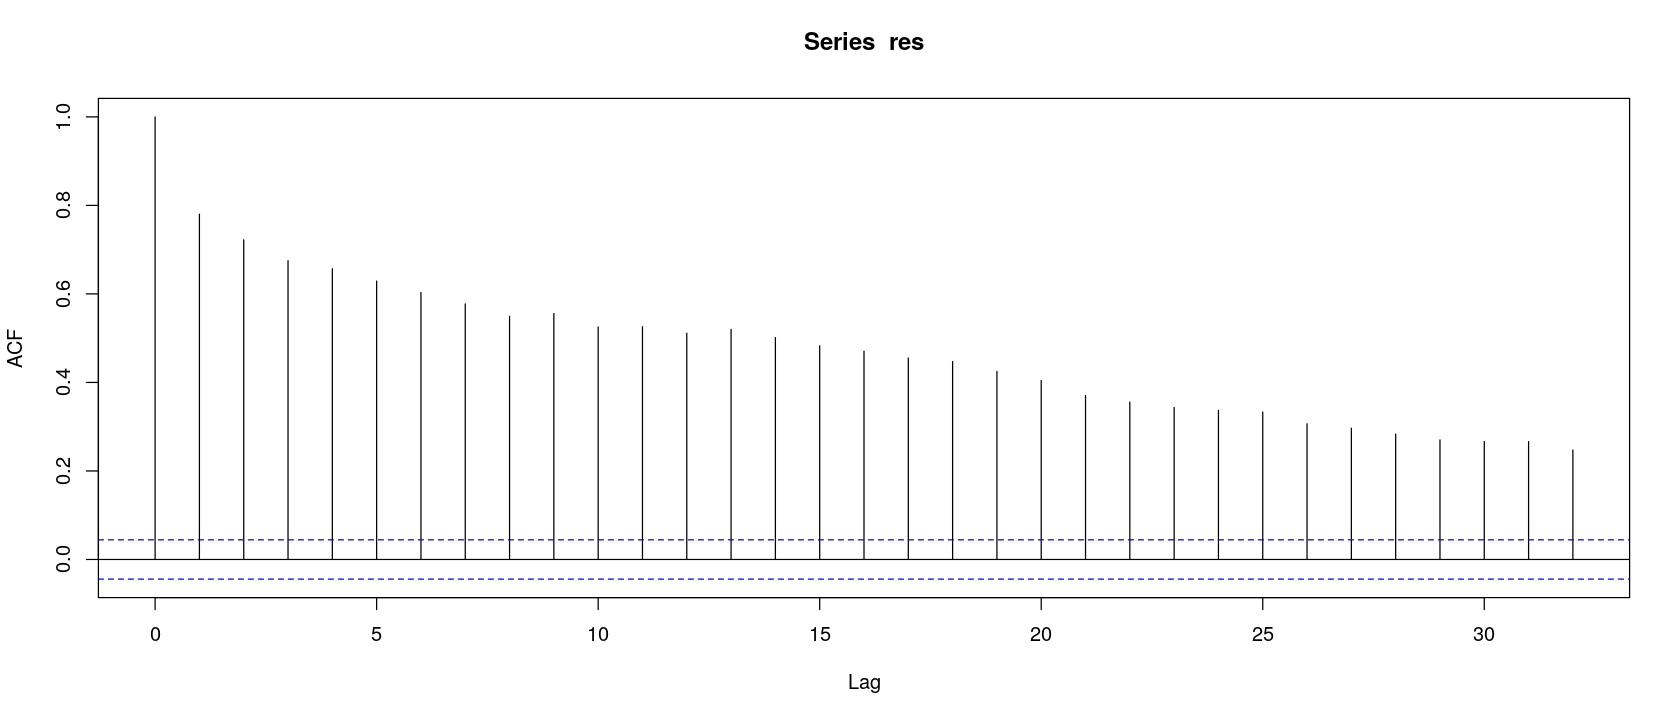

In [37]:
acf(res)

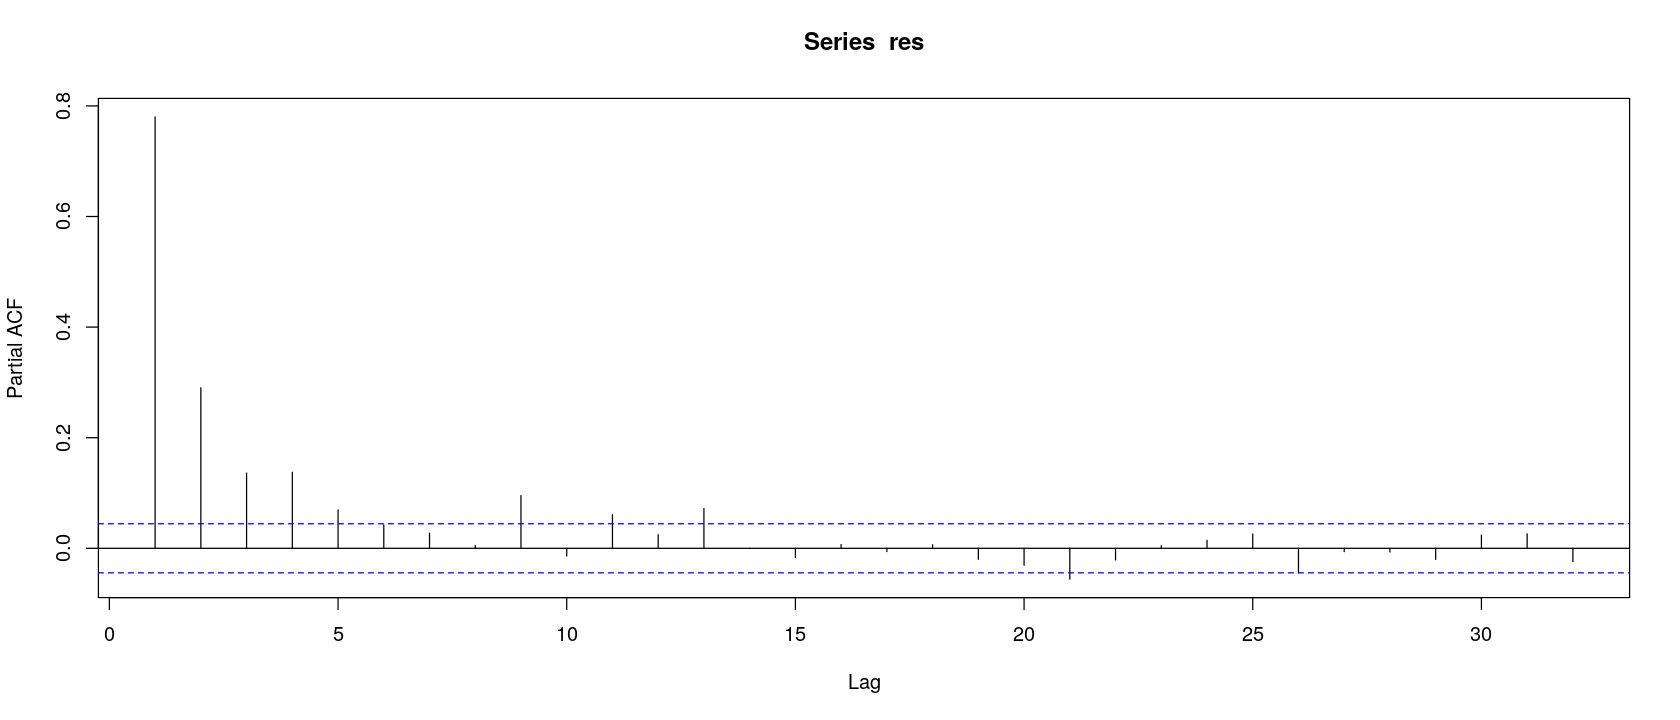

In [38]:
pacf(res)

In [39]:
ldncr1 = res
        
fit = Arima(ldncr1, order = c(5,0,0), include.mean=FALSE)
fore = forecast(fit, h=1)   

ldnt = as.numeric(ldnt)

e = exp(1)

ldnt = ts(ldnt, start=start_test -1, frequency=1)    

v_ldnt = ldnt #c + predictiont
v_pred = fore$mean + fore_f + predict_trend

v_ldnt = (e^v_ldnt) 
v_pred = (e^v_pred) -1 

v_ldnt[1:5]
v_pred[1:5]
ret = c(v_ldnt[1], v_pred[1], time(v_ldnt)[1], time(v_pred)[1],fore$mean,fore_f,predict_trend)
ret

[1]  8.801720 16.746083  7.113607  1.280477  1.026700

1     <NA>     <NA>     <NA>     <NA> 
4.824737       NA       NA       NA       NA

1                                               1 
   8.801720    4.824737 2949.000000 2949.000000    0.404439   -1.875367 
          1 
   3.233042

In [40]:
summary(fit)

Series: ldncr1 
ARIMA(5,0,0) with zero mean 

Coefficients:
         ar1     ar2     ar3     ar4     ar5
      0.4858  0.1806  0.0523  0.1025  0.0699
s.e.  0.0226  0.0250  0.0253  0.0251  0.0226

sigma^2 estimated as 0.8319:  log likelihood=-2585.57
AIC=5183.14   AICc=5183.18   BIC=5216.59

Training set error measures:
                       ME      RMSE       MAE       MPE     MAPE     MASE
Training set -0.004742781 0.9108934 0.6326805 -105.1331 317.3328 1.008396
                     ACF1
Training set -0.002676917

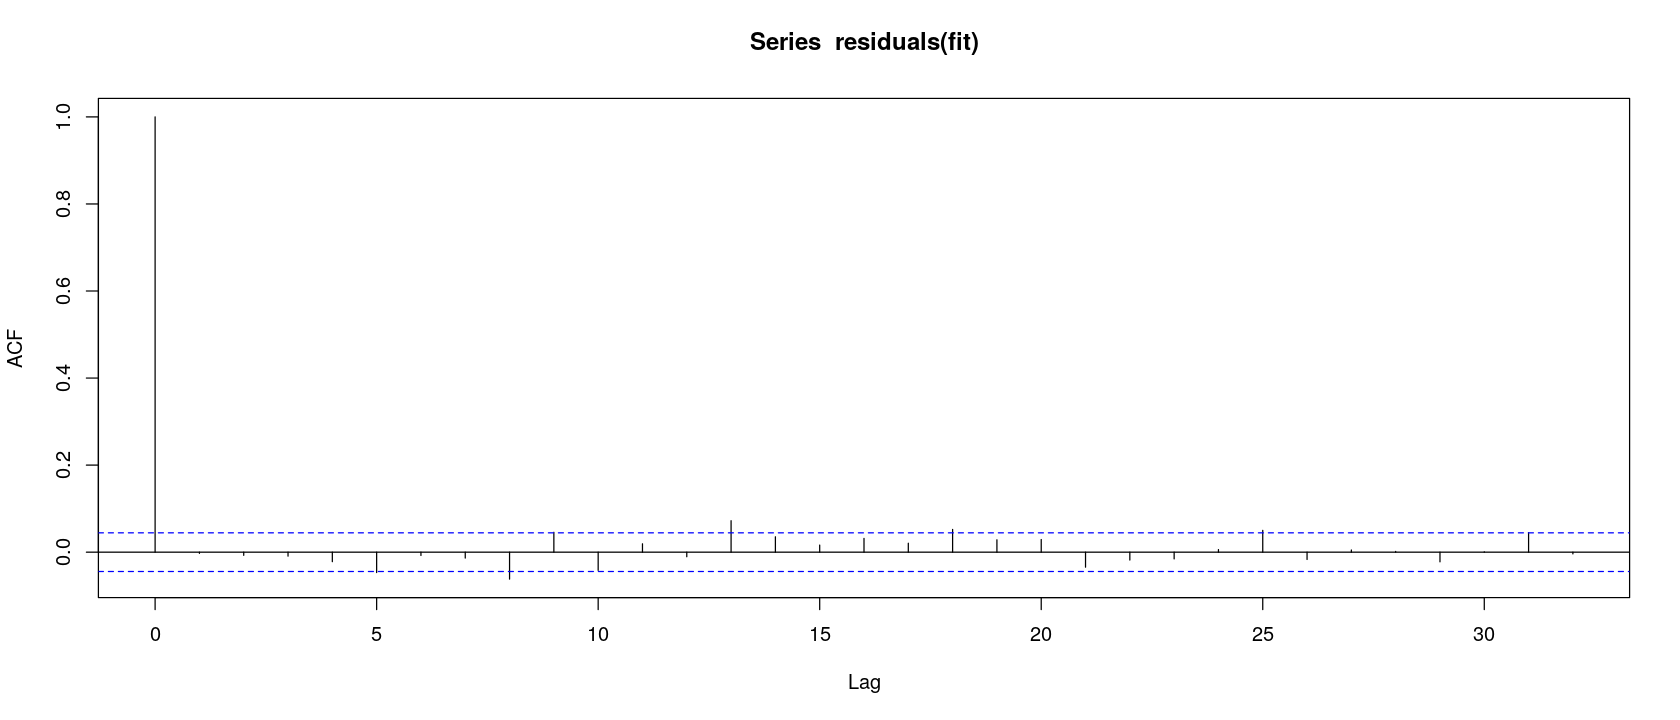

In [41]:
acf(residuals(fit))

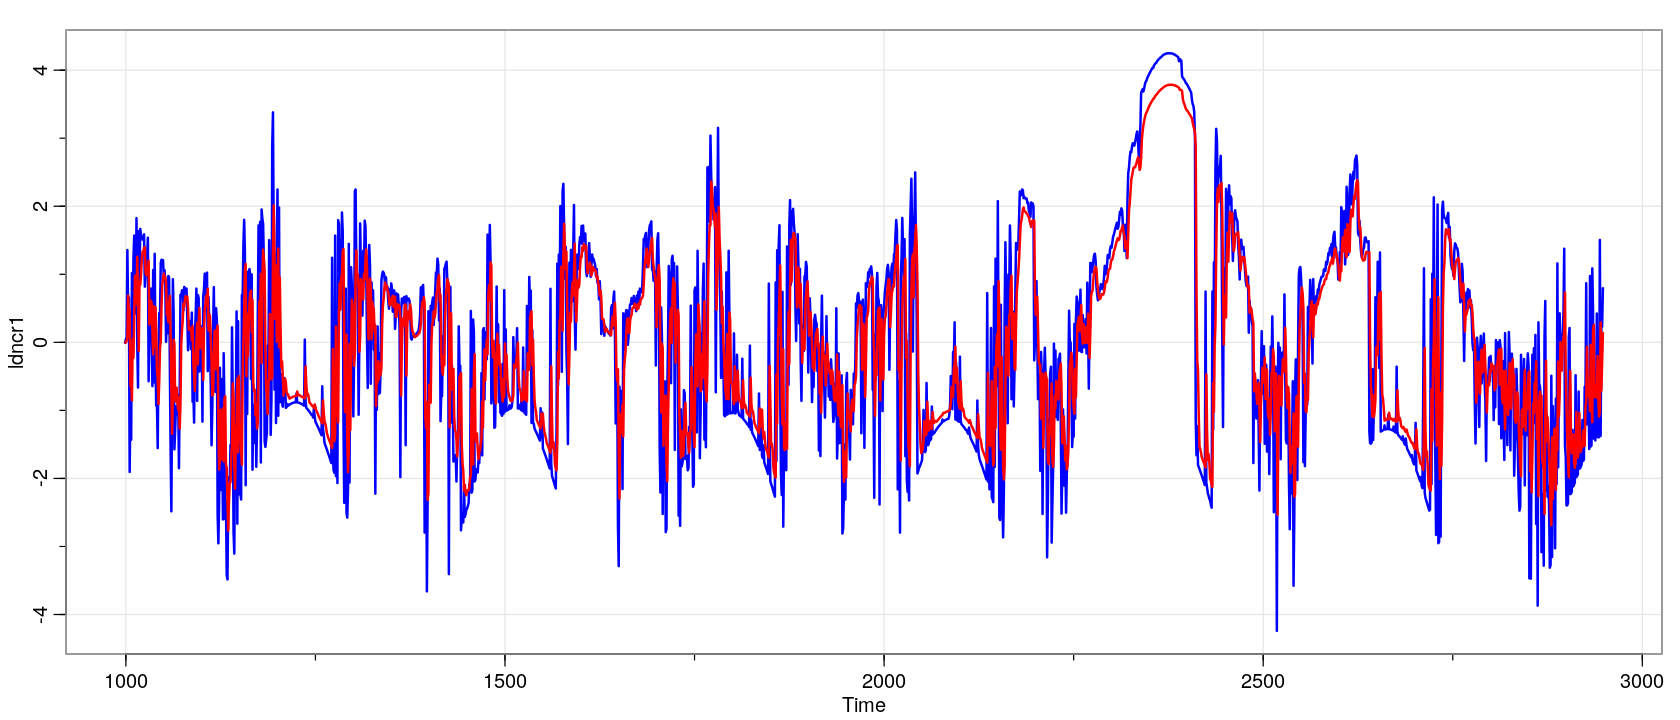

In [42]:
tsplot(ldncr1, col=4, lwd=2)
lines(fitted(fit), col=2, lwd=2)

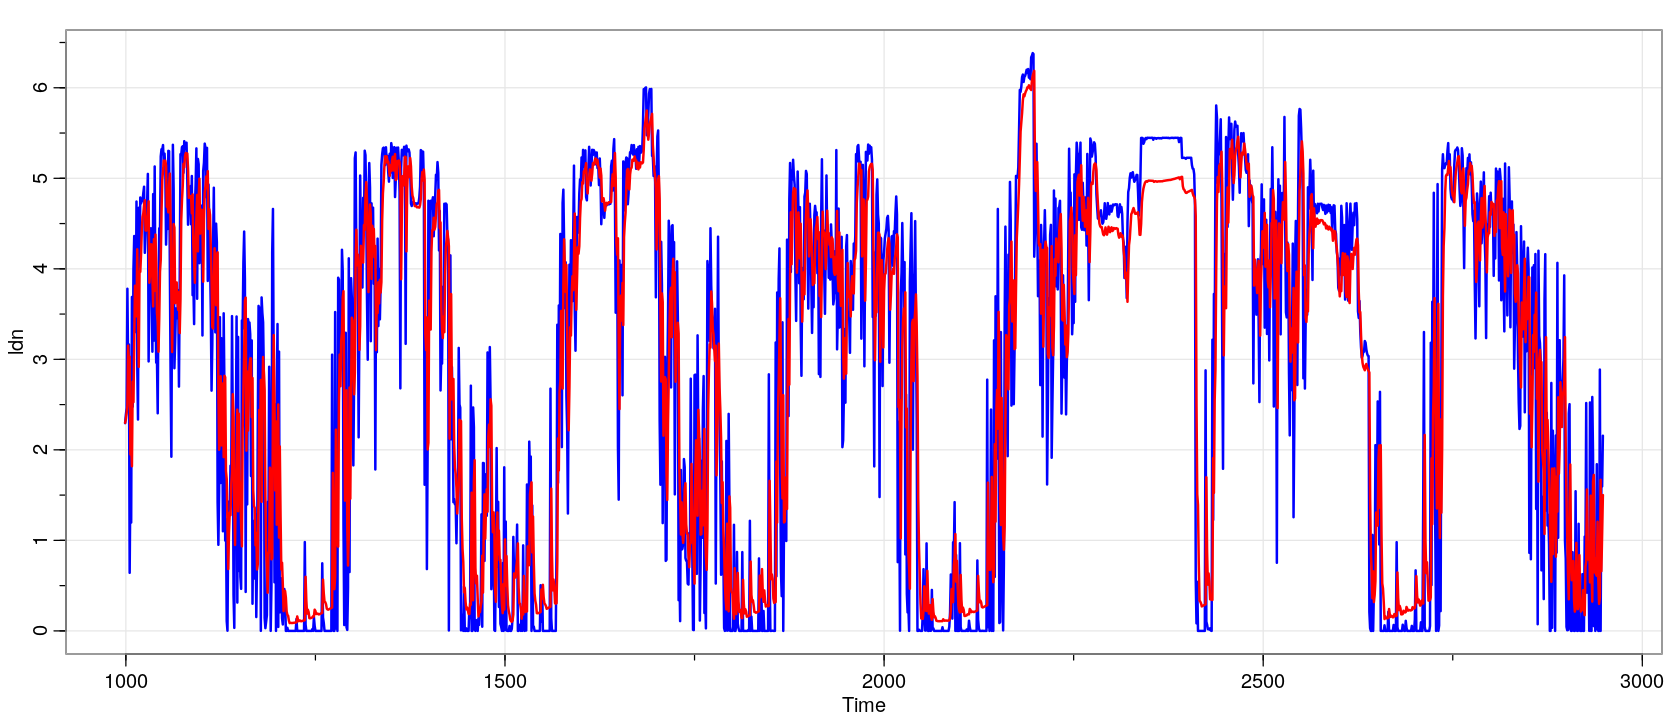

In [43]:
tsplot(ldn, col=4, lwd=2)
lines(predicttrend+prediction+fitted(fit), , col=2, lwd=2)

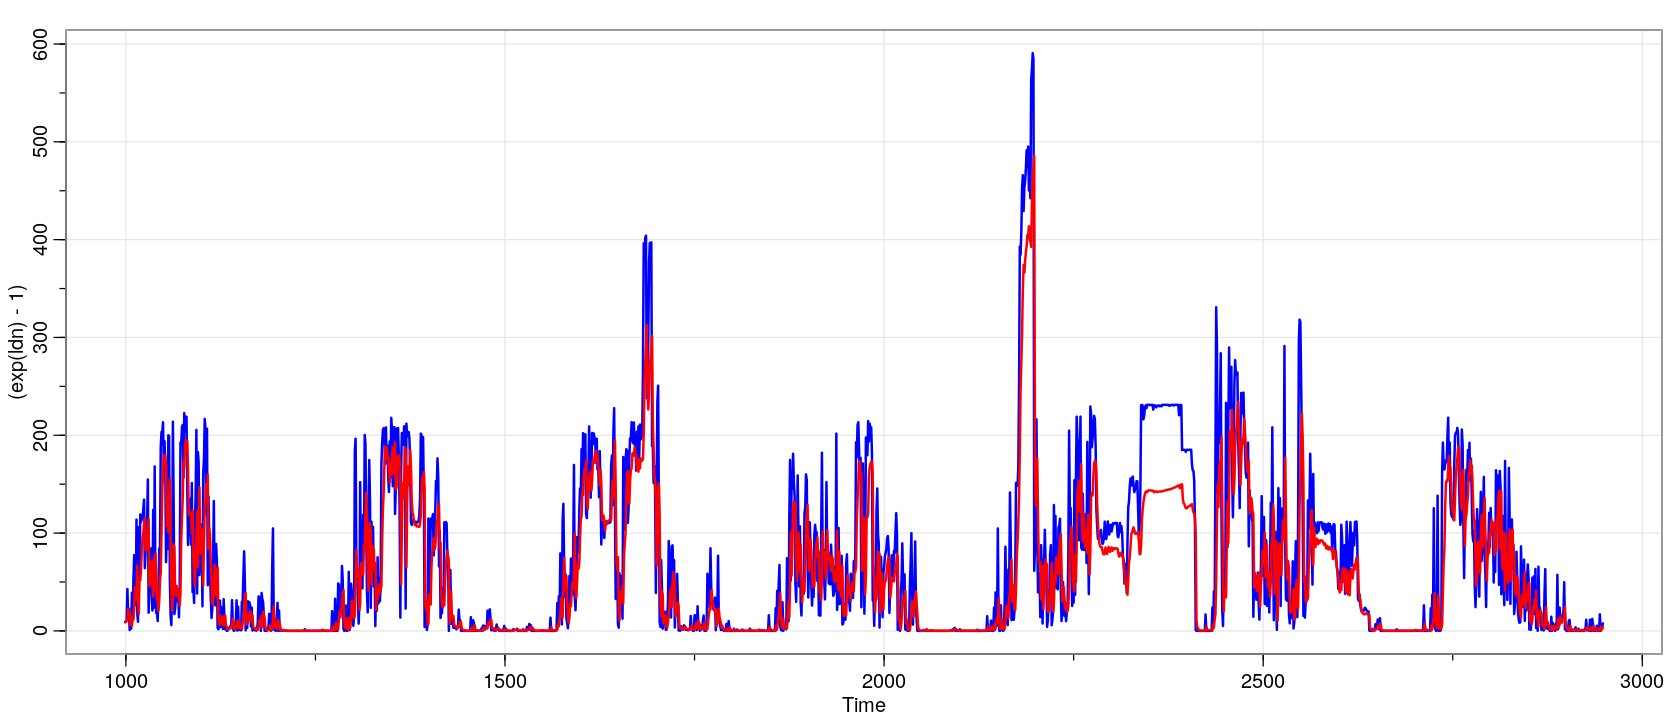

In [44]:
tsplot((exp(ldn)-1), col=4, lwd=2)
lines((exp(predicttrend+prediction+fitted(fit))-1), , col=2, lwd=2)

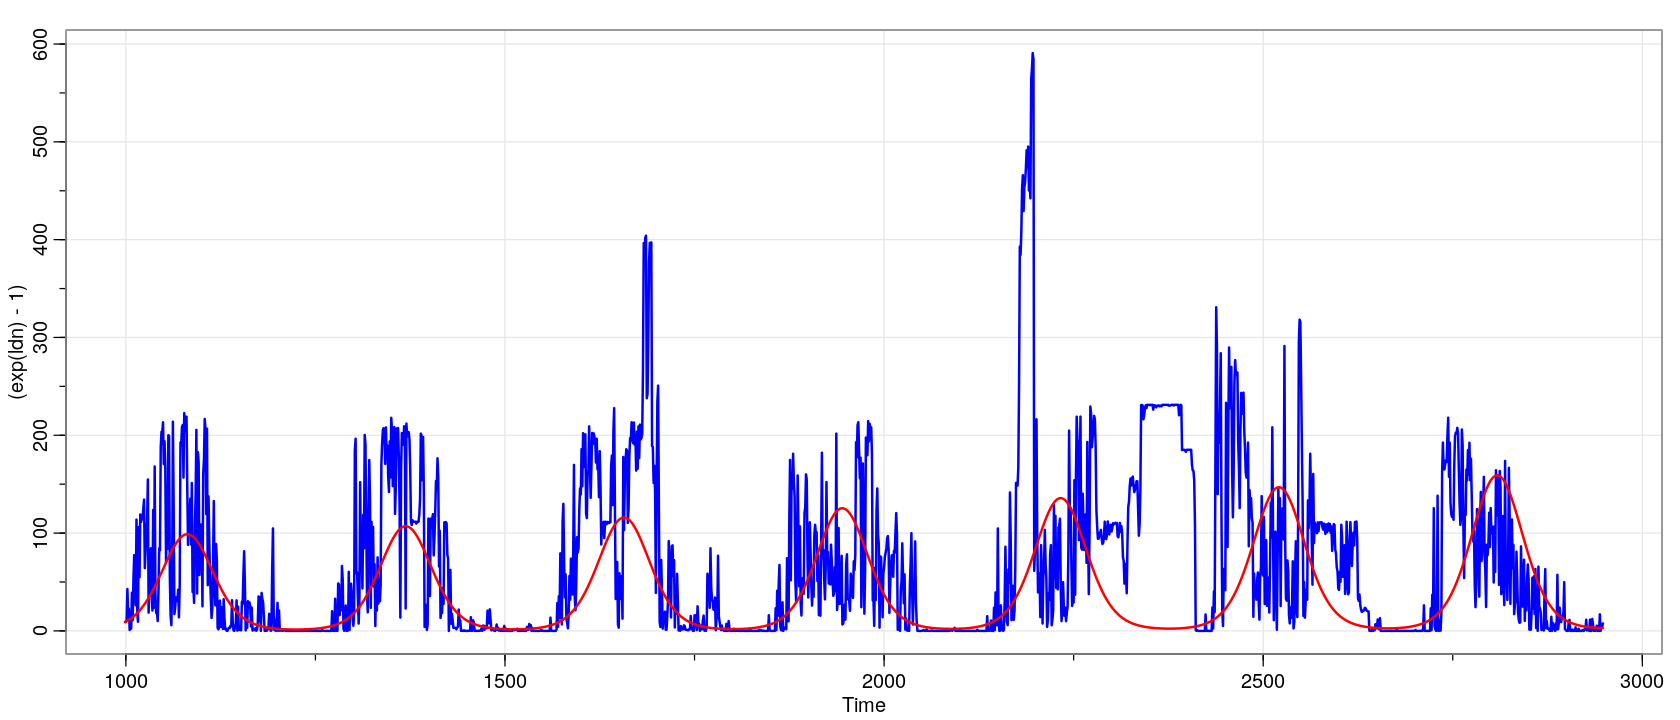

In [45]:
tsplot((exp(ldn)-1), col=4, lwd=2)
lines((exp(predicttrend+prediction)-1), , col=2, lwd=2)

In [46]:
#testv <- train_predict(6500-6400, 6500, ts_df)
#testv